<a href="https://colab.research.google.com/github/coddingyun/pytorch/blob/main/Bookstudy_ch6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7. 다층 퍼셉트론으로 손글씨 분류하기

###1. 숫자 필기 데이터 소개

- 사이킷런 패키지에서 제공하는 분류용 예제 데이터
- load_digits() 명령으로 로드
-0부터 15까지의 명암을 가지는 8x8 픽셀 해상도의 흑백 이미지

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


- 8x8 행렬로 출력
- 0은 흰색, 나머지는 검은색
- 인덱스의 숫자를 나타냄

In [ ]:
print(digits.target[0])

0


In [ ]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


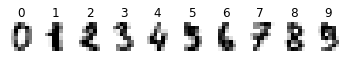

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
  plt.subplot(1, 10, index+1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('%i' %label)

In [ ]:
for i in range(10):
  print(i,'번 인덱스 샘플의 레이블 :', digits.target[i])

0 번 인덱스 샘플의 레이블 : 0
1 번 인덱스 샘플의 레이블 : 1
2 번 인덱스 샘플의 레이블 : 2
3 번 인덱스 샘플의 레이블 : 3
4 번 인덱스 샘플의 레이블 : 4
5 번 인덱스 샘플의 레이블 : 5
6 번 인덱스 샘플의 레이블 : 6
7 번 인덱스 샘플의 레이블 : 7
8 번 인덱스 샘플의 레이블 : 8
9 번 인덱스 샘플의 레이블 : 9


In [ ]:
print(digits.data[0])
#64차원 벡터로 출력

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
X = digits.data
Y = digits.target

###2. 다층 퍼셉트론 분류기 만들기

In [ ]:
import torch
import torch.nn as nn
from torch import optim

In [ ]:
model = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10),
)
#64차원의 벡터를 통해 0에서 9까지 총 10개를 분류해야한다.

In [ ]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
# 이 비용함수는 소프트맥스 함수 포함
optimizer = optim.Adam(model.parameters())
losses=[]

In [ ]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))
  losses.append(loss.item())

Epoch    0/100 Cost: 2.475134
Epoch   10/100 Cost: 2.169901
Epoch   20/100 Cost: 1.977675
Epoch   30/100 Cost: 1.714403
Epoch   40/100 Cost: 1.412968
Epoch   50/100 Cost: 1.068196
Epoch   60/100 Cost: 0.746303
Epoch   70/100 Cost: 0.512641
Epoch   80/100 Cost: 0.366212
Epoch   90/100 Cost: 0.276667


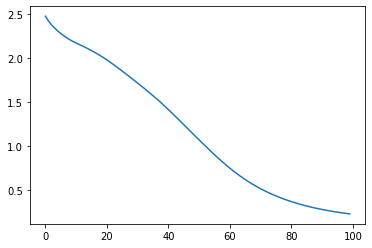

In [ ]:
plt.plot(losses)

#8. 다층 퍼셉트론으로 MNIST 분류하기

###1. 데이터 로드하기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
mnist.target[0]

'5'

In [ ]:
mnist.target=mnist.target.astype(np.int8)

X = mnist.data / 255 #0~255값을 [0,1] 사이 값으로 정규화
y=mnist.target

X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y[0]

5

이 이미지 데이터 레이블은 5이다


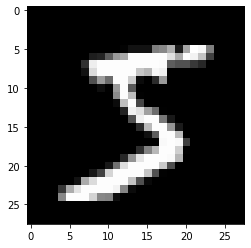

In [ ]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
print("이 이미지 데이터 레이블은 {:.0f}이다".format(y[0]))

###2. 훈련 데이터와 테스트 데이터의 분리

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

###3. 다층 퍼셉트론

In [ ]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
from torch import optim

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(),lr=0.01)

In [ ]:
def train(epoch):
  model.train()

  for data, targets in loader_train:
    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_fn(outputs, targets)

    loss.backward()
    optimizer.step()

  print("epoch{}：완료\n".format(epoch))

In [ ]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [ ]:
test()


테스트 데이터에서 예측 정확도: 936/10000 (9%)



In [ ]:
for epoch in range(3):
  train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9645/10000 (96%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


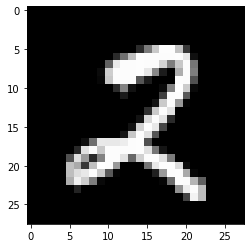

In [ ]:
index = 2018

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

#9. 과적합을 막는 방법들

###1. 데이터의 양을 늘리기

- 데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습, 과적합 방지

- 데이터 양이 적을 경우 의도적으로 데이터를 조금씩 변형하고 추가하여 데이터 양을 늘림 (Data Augmentation)

###2. 모델의 복잡도 줄이기
- 인공 신경망의 복잡도를 줄임

- 인공 신경망에서는 모델에 있는 매개변수들의 수를 모델의 capacity이라고 하기도 함.

###3. 가중치 규제 적용하기

- L1 규제: 가중치들의 절대적 합계를 비용함수에 추가 - L1노름

- L2 규제: 모든 가중치들의 제곱합을 비용함수에 추가 - L2노름

- weight_dacay로 L2 규제 적용

###4. 드롭아웃
- 학습 과정에서 신경망의 일부를 사용하지 않는 방법
- 이는 학습시에만 사용하고, 예측시에는 사용하지 않는 것이 일반적
- 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지

#10. Gradient Vanishing and Exploding

- 기울기 소실: 역전파 과정에서 입력층으로 갈 수록 기울기가 점차적으로 작아지는 현상

- 기울기 폭주: 가중치들이 비정상적으로 큰 값이 되는 경우, 순환 신경망에서 발생가능

###1. ReLU와 ReLU의 변형들
- 시그모이드 함수의 경우 출력값이 0또는 1에 수렴하며 기울기가 점차 사라짐
- 은닉층에서는 시그모이드 함수를 사용하지 마세요.
- Leaky ReLU를 사용하면 모든 입력값에 대해서 기울기가 0에 수렴하지 않아 죽은 ReLU 문제를 해결합니다.
- 은닉층에서는 ReLU나 Leaky ReLU와 같은 ReLU 함수의 변형들을 사용하세요.

###2. 가중치 초기화(Weight initialization)

1. Xavier Initialization(Glorot Initialization): 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세움

- 균등 분포: $$W \sim Uniform(-\sqrt{6/n_{in}+n_{out}},\sqrt{6/n_{in}+n_{out}})$$

- 정규분포: $$\sigma=\sqrt{2/n_{in}+n_{out}}$$

- 세이비어 초기화는 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 막음


2. He initialization

- 균등 분포: $$W \sim Uniform(-\sqrt{6/n_{in}},\sqrt{6/n_{in}})$$

- 정규분포: $$\sigma=\sqrt{2/n_{in}}$$

- 다음 층의 뉴런의 수를 반영하지 않음



- 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용할 경우에는 세이비어 초기화 방법이 효율적입니다.
- ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적입니다.
- ReLU + He 초기화 방법이 좀 더 보편적입니다.

###3. Batch Normalization
: 한 번에 들어오는 배치 단위로 정규화

- 입력에 대해 평균을 0으로 만들고, 정규화
- 정규화 된 데이터에 대해서 스케일과 시프트를 수행


- 배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선됩니다.
- 가중치 초기화에 훨씬 덜 민감해집니다.
훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선시킵니다.
- 미니 배치마다 평균과 표준편차를 계산하므로 훈련 데이터에 일종의 잡음을 넣는 부수 효과로 과적합을 방지하는 효과도 냅니다. 하지만 부수적 효과이므로 드롭 아웃과 함께 사용하는 것이 좋습니다.
- 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려집니다. 그래서 서비스 속도를 고려하는 관점에서는 배치 정규화가 꼭 필요한지 고민이 필요합니다.
- 배치 정규화의 효과는 굉장하지만 내부 공변량 변화때문은 아니라는 논문도 있습니다.

한계>

- 미니 배치 크기에 의존적
  + 배치 크기가 1일 경우 분산은 0이 된다.
  + 어느 정도 큰 배치에서 사용
- RNN에 적용하기 힘듦 -> 층 정규화

###5. Layer Normalization

![image.png](https://wikidocs.net/images/page/61375/%EC%B8%B5%EC%A0%95%EA%B7%9C%ED%99%94.PNG)